In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Normality tests
from scipy.stats import normaltest as dagostino_test # D'Agostino test
from scipy.stats import anderson as and_dar_test # Anderson-Darling Test
from scipy.stats import kstest as kol_smi_test # Kolmogorov-Smirnov Test
from scipy.stats import shapiro as shap_wil_test # Shapiro-Wilk Test
from scipy.stats import jarque_bera as jarque_bera_test # Jarque-Bera Test

# ANOVA
from scipy.stats import f_oneway # Parametric
from scipy.stats import kruskal # Non-Parametric

# Statistical Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

from scipy.stats import gamma as gamma_test
from fitter import Fitter

In [2]:
date = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/florestal/florestal_20170112_distribution.csv')
date_fs = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/savanica/savanica_20170112_distribution.csv')
date_fc = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/campestre/campestre_20170112_distribution.csv')

In [59]:
from fitter import get_distributions
get_distributions()

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'pow

,sumsquare_error,aic,bic,kl_div
gamma,0.555709,181.169736,-6.203636e+06,0.003721


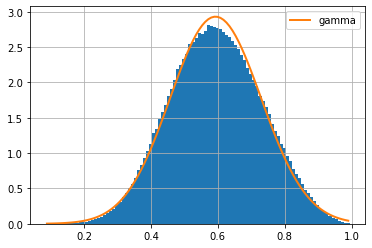

In [7]:
f = Fitter(date_fs['DpRVI'], distributions=['gamma'])
fit = f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [8]:
f.get_best()

{'gamma': {'a': 22542.204132937884,
  'loc': -19.85252378819414,
  'scale': 0.0009070251504487725}}

In [81]:
test['sumsquare_error'][0]

65.23272829971194

In [85]:
teste = pd.DataFrame(f.get_best().values())
teste['dist'] = f.get_best().keys()
teste['sumsquare_error'] = test['sumsquare_error'][0]
teste

,s,loc,scale,dist,sumsquare_error
0,0.673778,0.000005,0.004595,lognorm,65.232728


In [62]:
cols = teste.columns.tolist()
cols

['s', 'loc', 'scale', 'dist', 'sumsquare_error']

In [63]:
cols = cols[-2:] + cols[:-2]
cols

['dist', 'sumsquare_error', 's', 'loc', 'scale']

In [64]:
df = teste[cols]
df

,dist,sumsquare_error,s,loc,scale
0,lognorm,65.232728,0.673778,0.000005,0.004595


(array([1.61042769e-01, 4.07639508e-01, 9.61224026e-01, 1.58023217e+00,
        2.77295517e+00, 4.38338286e+00, 6.93993681e+00, 9.81857631e+00,
        1.37792219e+01, 1.77348349e+01, 2.25057269e+01, 2.68589143e+01,
        3.17908491e+01, 3.64107635e+01, 4.15691647e+01, 4.44679345e+01,
        4.78347349e+01, 5.18507389e+01, 5.43167063e+01, 5.56302114e+01,
        5.62341218e+01, 5.78093214e+01, 5.96713784e+01, 5.93593580e+01,
        5.89466859e+01, 5.92234782e+01, 5.84484599e+01, 5.73664538e+01,
        5.68531299e+01, 5.63549039e+01, 5.44475536e+01, 5.19815862e+01,
        5.13072196e+01, 4.99232583e+01, 4.73868347e+01, 4.62494701e+01,
        4.41961748e+01, 4.27065292e+01, 4.12420466e+01, 4.04821260e+01,
        3.76538124e+01, 3.68485985e+01, 3.60484173e+01, 3.34717330e+01,
        3.25910303e+01, 3.06585171e+01, 2.96721301e+01, 2.87763297e+01,
        2.68790446e+01, 2.61744825e+01, 2.46546414e+01, 2.40758939e+01,
        2.23748797e+01, 2.17508389e+01, 2.06034092e+01, 2.010015

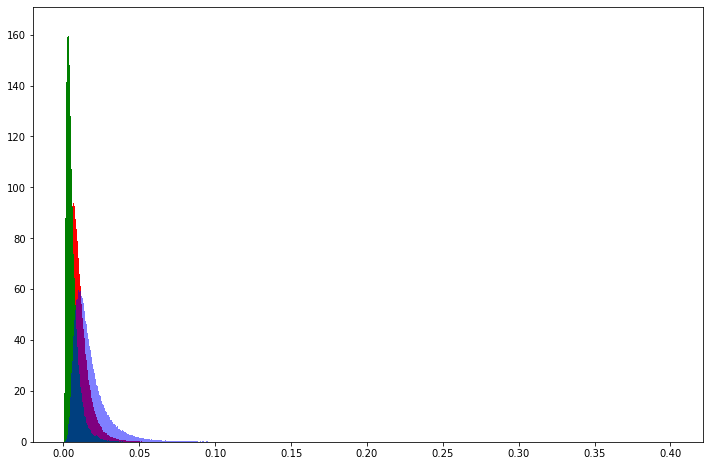

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(date_fc['DPSVIm'], bins=1000, alpha=1, color='red', density=True)
ax.hist(date_fs['DPSVIm'], bins=1000, alpha=1, color='green', density=True)
ax.hist(date_ff['DPSVIm'], bins=1000, alpha=0.5, color='blue', density=True)

In [24]:
p_value = 0.05

In [25]:
# Teste de normalidade (d'agostino e Pearson)

print('H0: The data come from a normal distribution\n')

estatistica, p_valor = dagostino_test(date['DpRVI'])

print("estatística =", round(estatistica, 3))
print("p-valor =", round(p_valor, 3))
print()

# Estrutura condicional que testará a hipótese nula
if p_valor < 0.05:
    print("Reject H0")
else:
    print("Accept H0")

H0: The data come from a normal distribution

estatística = 4110.663
p-valor = 0.0

Reject H0


In [19]:
# Normality_test (Anderson-Darling)
print('H0: The data come from a normal distribution\n')

statistic, critical_values, significance_level = and_dar_test(date['RVI'], dist='norm')

print("statistic =", round(statistic, 3))
print("critical value =", critical_values[2])
print("significance level (%) = ", significance_level[2])
print()

if statistic > critical_values[2]:
    print("Reject H0")
else:
    print("Accept H0")

H0: The data come from a normal distribution

statistic = 2050.857
critical value = 0.787
significance level (%) =  5.0

Reject H0


In [29]:
# Teste de normalidade (Kolmogorov-Smirnov)

print('H0: The two distribution are identical')
print('H1: The two distribution are not identical\n')

statistic, p_valor = kol_smi_test(date['PRVI'], 'gamma', args=(15.5, 0, 1./7))

print("statistic =", round(statistic, 3))
print("p-value =", round(p_valor, 3))
print()

# Estrutura condicional que testará a hipótese nula
if p_valor < p_value:
    print("Reject H0")
else:
    print("Accept H0")

H0: The two distribution are identical
H1: The two distribution are not identical

statistic = 1.0
p-value = 0.0

Reject H0


In [28]:
# Teste de normalidade (Shapiro-Wilk)

print('H0: The data come from a normal distribution\n')

estatistica, p_valor = shap_wil_test(date['DpRVI'])

print("estatística =", round(estatistica, 3))
print("p-valor =", round(p_valor, 3))
print()

# Estrutura condicional que testará a hipótese nula
if p_valor < 0.05:
    print("Reject H0")
else:
    print("Accept H0")

H0: The data come from a normal distribution

estatística = 0.998
p-valor = 0.0

Reject H0


C:\Users\jales\anaconda3\envs\GATEC_projects\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [29]:
# Teste de normalidade (Shapiro-Wilk)

print('H0: The data come from a normal distribution\n')

estatistica, p_valor = jarque_bera_test(date['DpRVI'])

print("estatística =", round(estatistica, 3))
print("p-valor =", round(p_valor, 3))
print()

# Estrutura condicional que testará a hipótese nula
if p_valor < 0.05:
    print("Reject H0")
else:
    print("Accept H0")

H0: The data come from a normal distribution

estatística = 3265.707
p-valor = 0.0

Reject H0
